In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import math

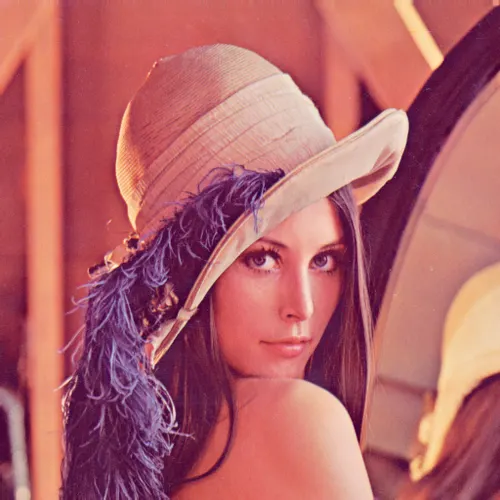

Image loaded successfully


In [ ]:
image = cv2.imread('/content/Lenna_(test_image).jpeg')

cv2_imshow(image)
if image is not None:
  print("Image loaded successfully")
else:
  print("Error loading the image")


In [ ]:
def shannon_fano_encoding(symbols, probs):

    sorted_symbols, sorted_probs = zip(*sorted(zip(symbols, probs), key=lambda item: item[1], reverse=True))

    codes = {}

    def build_code(symbols, probs, code=''):
        if len(symbols) == 1:
            codes[symbols[0]] = code
            return

        total_prob = sum(probs)
        current_prob = 0
        split_index = 0
        for i, prob in enumerate(probs):
            current_prob += prob
            if current_prob >= total_prob / 2:
                split_index = i + 1
                break

        build_code(symbols[:split_index], probs[:split_index], code + '0')
        build_code(symbols[split_index:], probs[split_index:], code + '1')

    build_code(sorted_symbols, sorted_probs)
    return codes

In [ ]:
symbols = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
probs = [0.2, 0.2, 0.125, 0.125, 0.125, 0.125, 0.05, 0.05]

In [ ]:
codes = shannon_fano_encoding(symbols, probs)
print(codes)

{'a': '000', 'b': '001', 'c': '01', 'd': '100', 'e': '101', 'f': '110', 'g': '1110', 'h': '1111'}
